In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 8)
mpl.rc('mathtext',fontset = 'stix')

mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
mpl.rc('axes', labelsize=8)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(8/2.54, 6/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)


cm_number = 14
cm = plt.cm.get_cmap("Purples")
colors = ["#F9D5DD","#E3738B","#713948"]
Colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

C:\Users\TengMa\AppData\Local\Temp\ipykernel_25952\3903555490.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("Purples")


In [2]:
omega = 1

def VDP1(x,t):
    # omega = 10; f(x)=(1-omega^2)x^2x'
    u = x[0]
    v = x[1]

    dx = [v, -omega**2*u+0.01*v-0.01*3*omega**2*u**2*v]
    return dx

def VDP2(x,t):
    # omega = 10; f(x)=x'-3x'^3
    u = x[0]
    v = x[1]

    dx = [v, -omega**2*u+0.01*v-0.01*v**3]
    return dx

In [3]:
T = 2000
Fs = 20

t = np.linspace(0,T,T*Fs)


x0 = [0.1,0]
response_1 = odeint(VDP1, y0 = x0, t= t)
response_2 = odeint(VDP2, y0 = x0, t= t)


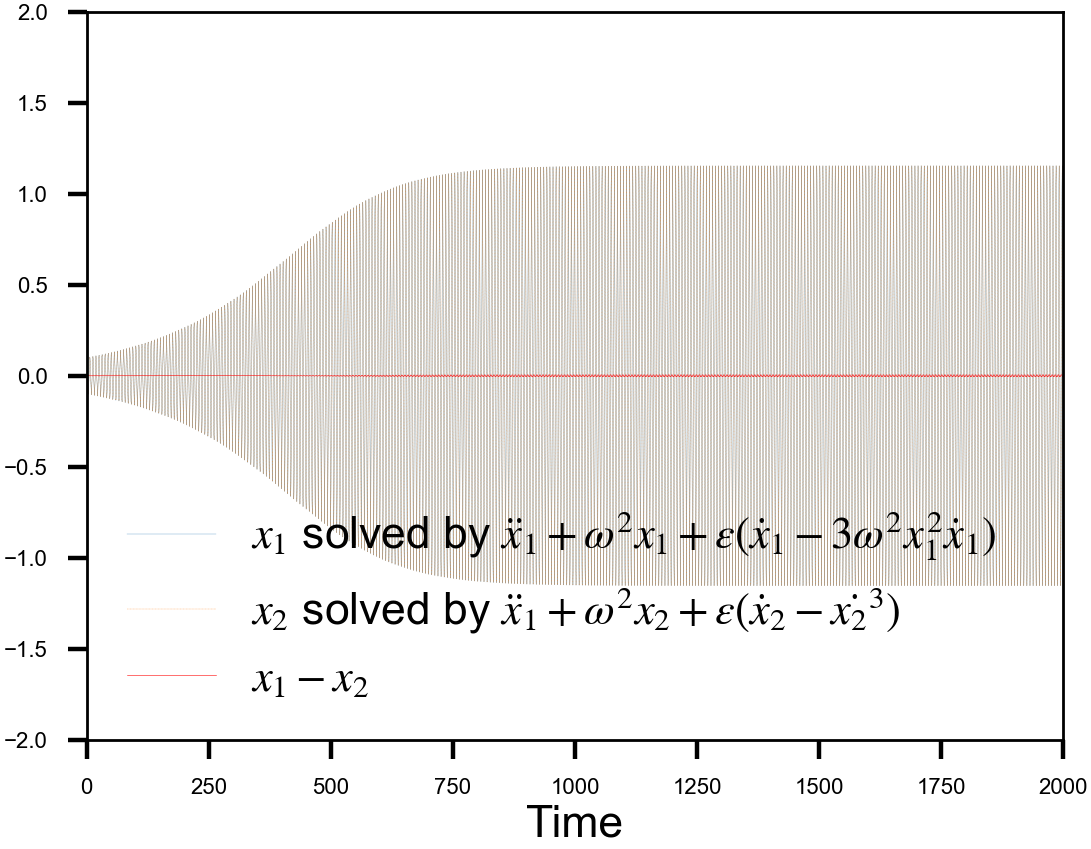

In [5]:
plt.plot(t,response_1[:,0], lw = 0.05, ls = '-', label = r"$x_1$ solved by $\ddot{x}_1+\omega^2 x_1+\epsilon(\dot{x}_1-3\omega^2x_1^2\dot{x}_1)$")
plt.plot(t,response_2[:,0], lw = 0.05, ls = '--', label = r"$x_2$ solved by $\ddot{x}_1+\omega^2 x_2+\epsilon(\dot{x}_2-\dot{x_2}^3)$")
plt.plot(t,response_1[:,0]-response_2[:,0], lw = 0.1,color = 'red',label = r'$x_1-x_2$')
plt.legend()
plt.xlabel('Time')
plt.xlim(0,2000)
plt.ylim(-2,2)
plt.savefig('./Fig/nonorthogonal.svg')
plt.savefig('./Fig/nonorthogonal.pdf')